Saving student-por.xlsx to student-por.xlsx
Shape: (649, 33)

Data Types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    

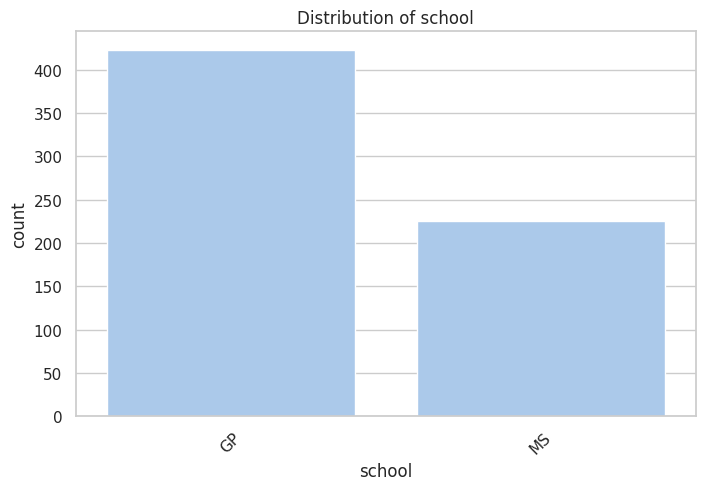

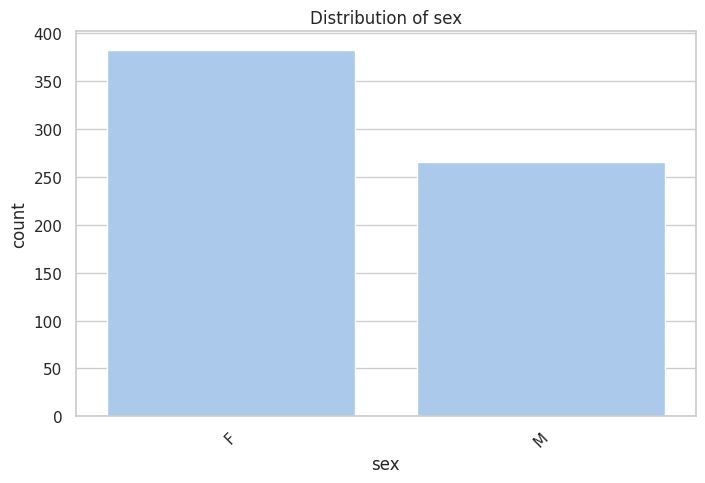

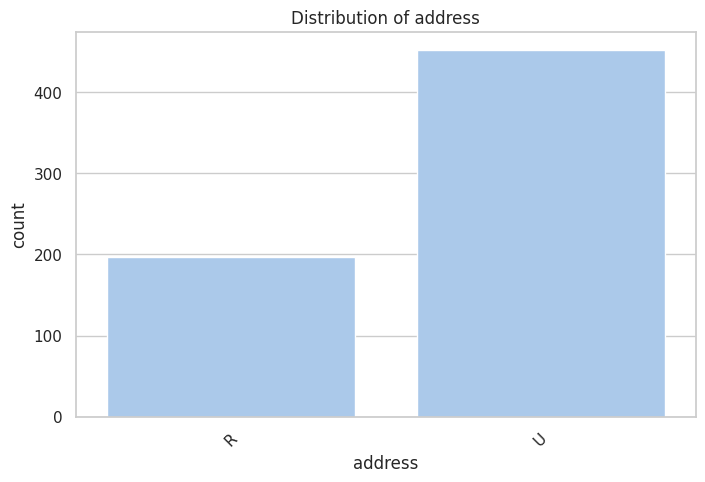

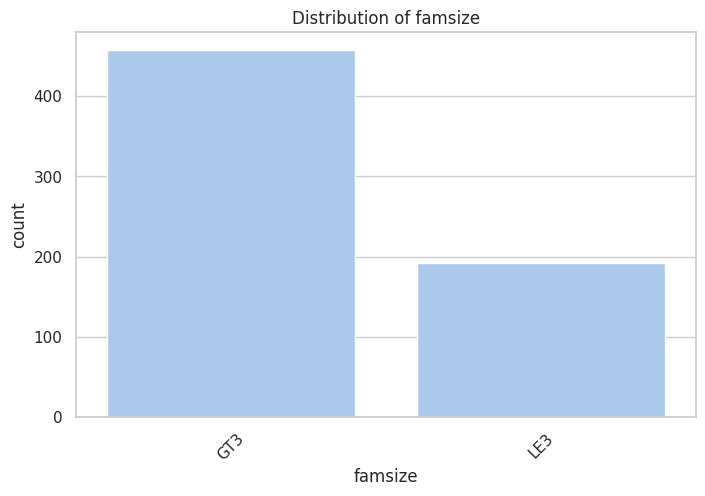

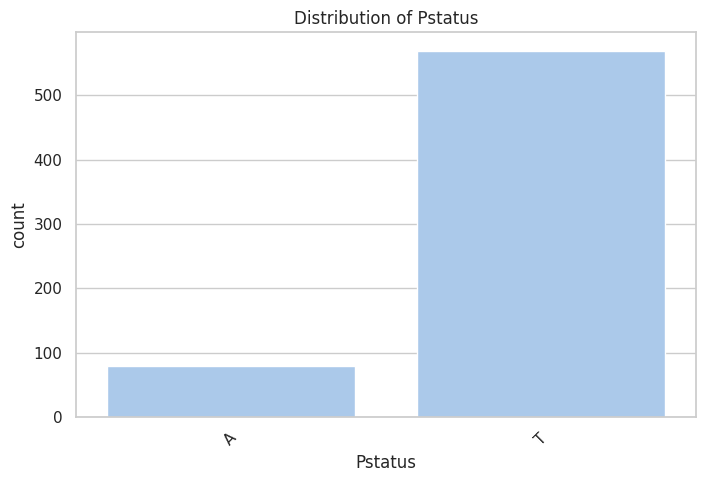

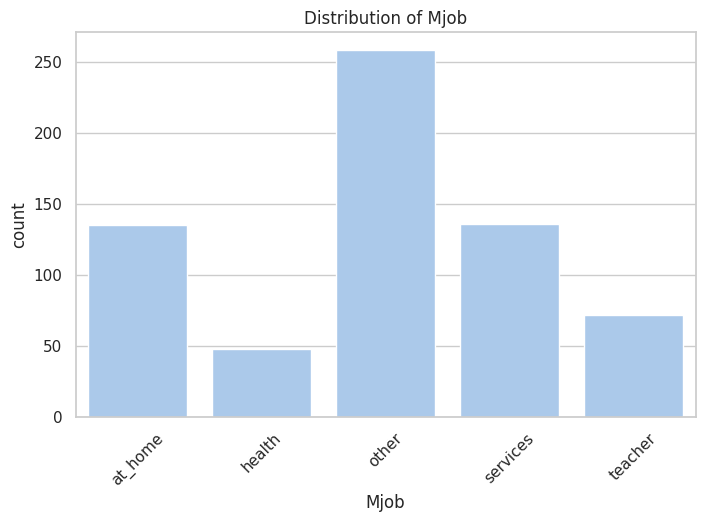

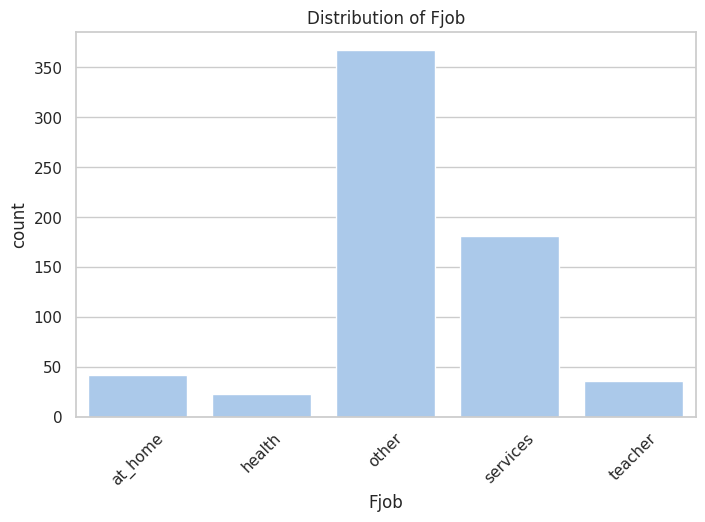

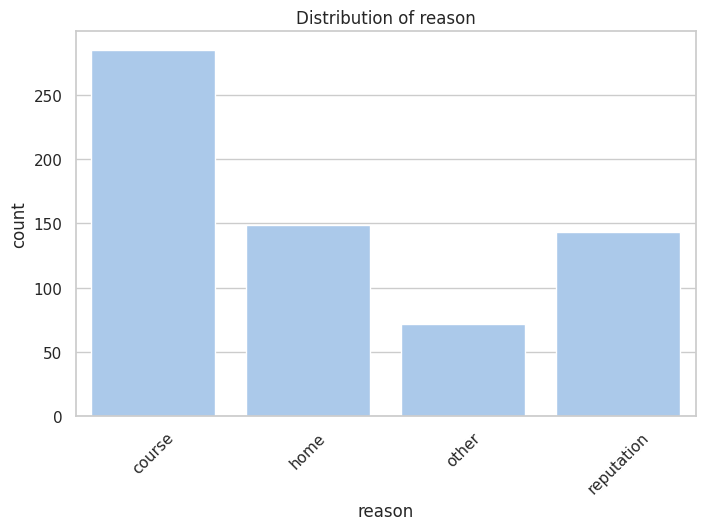

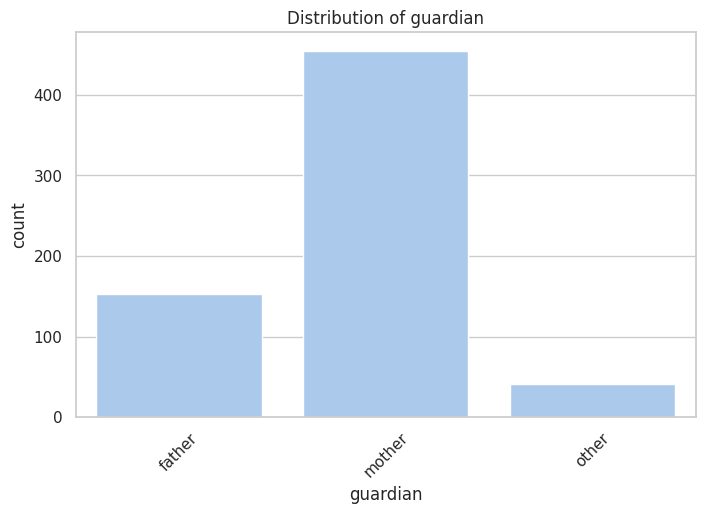

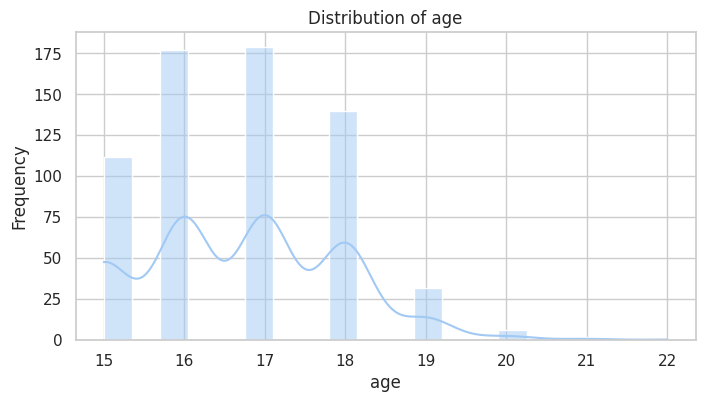

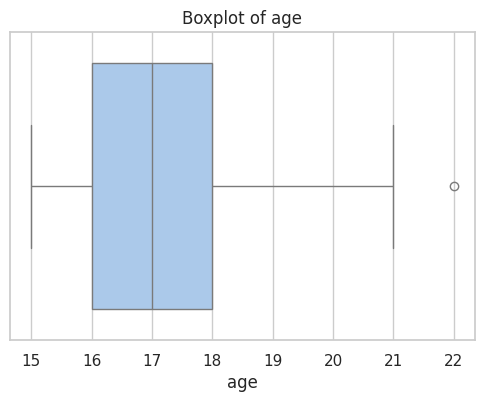

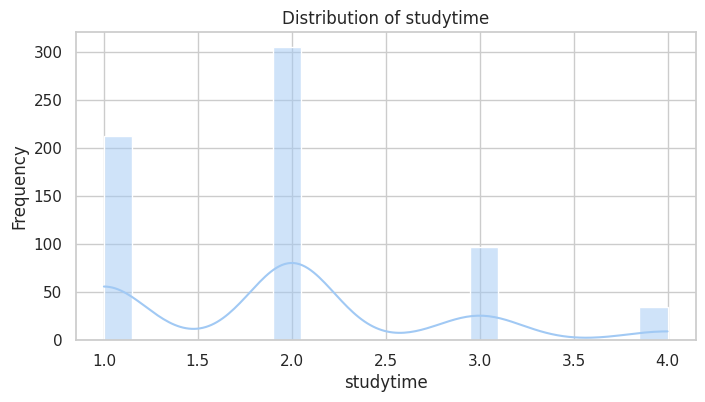

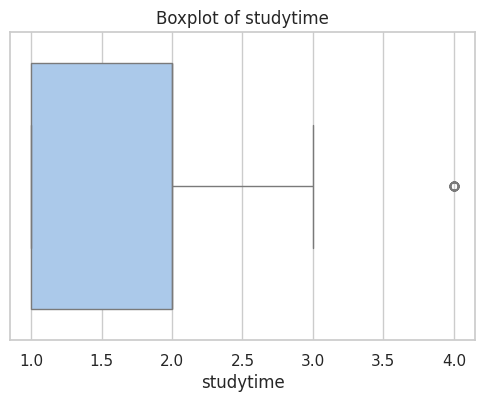

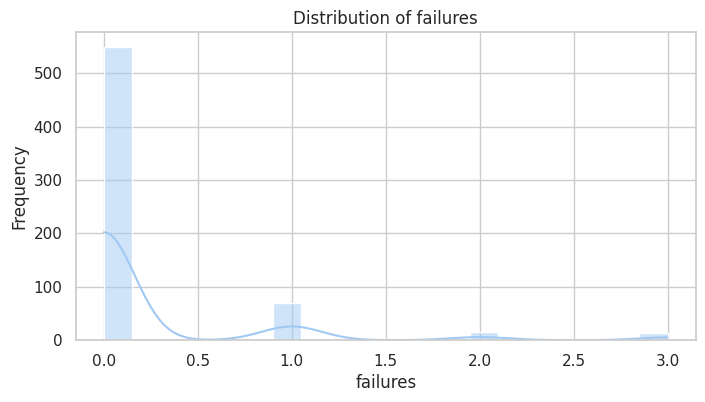

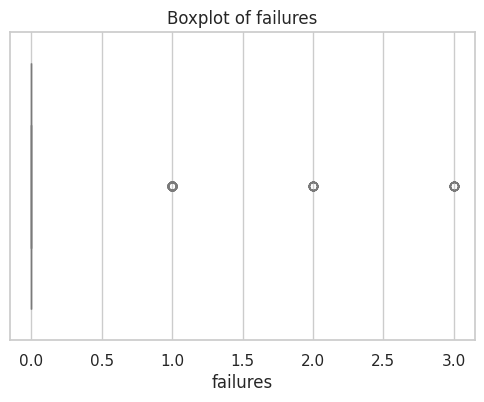

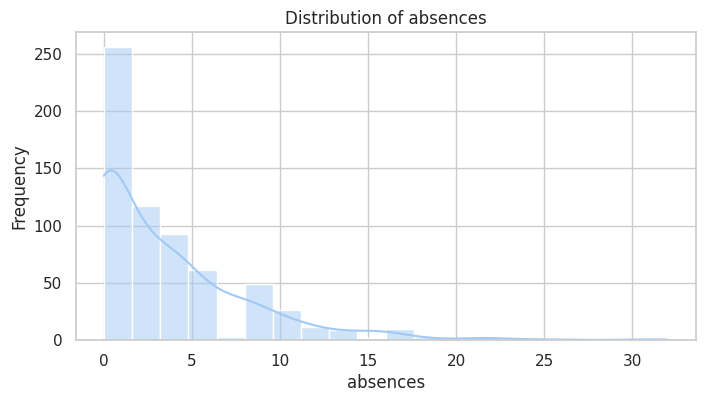

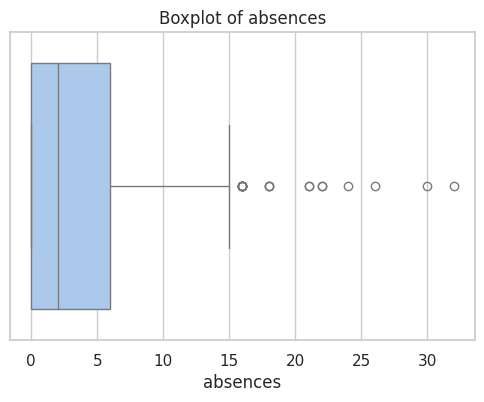

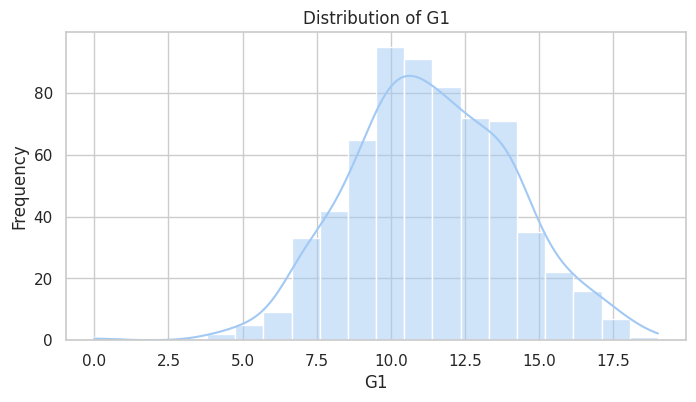

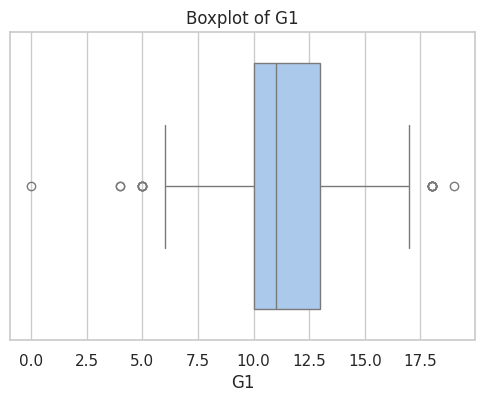

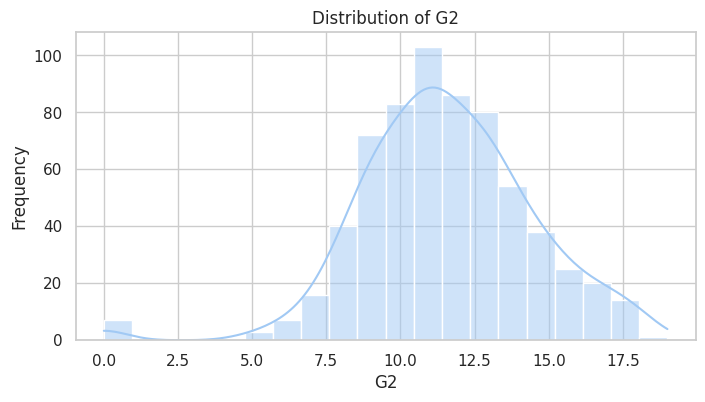

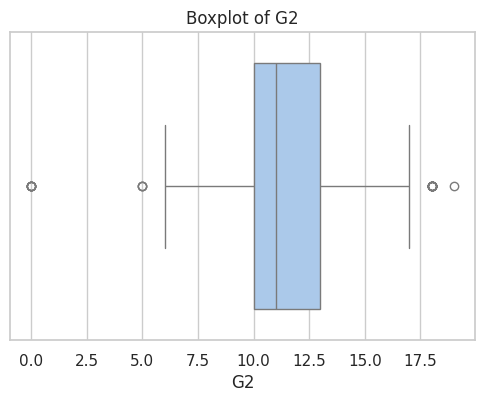

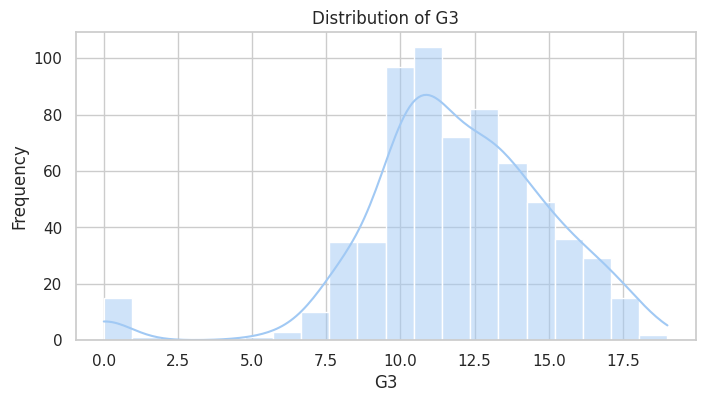

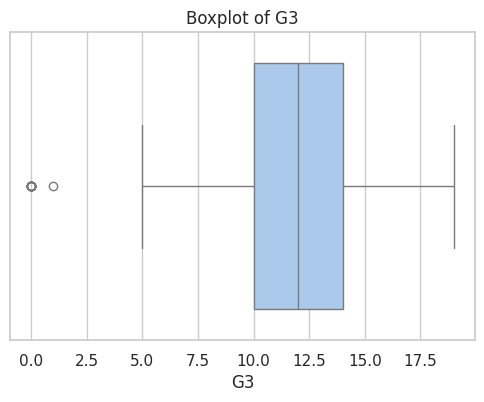

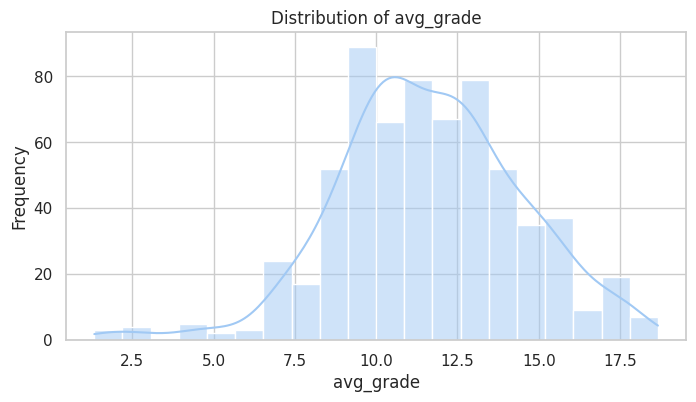

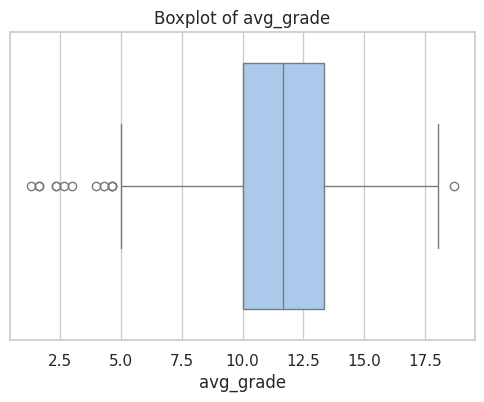

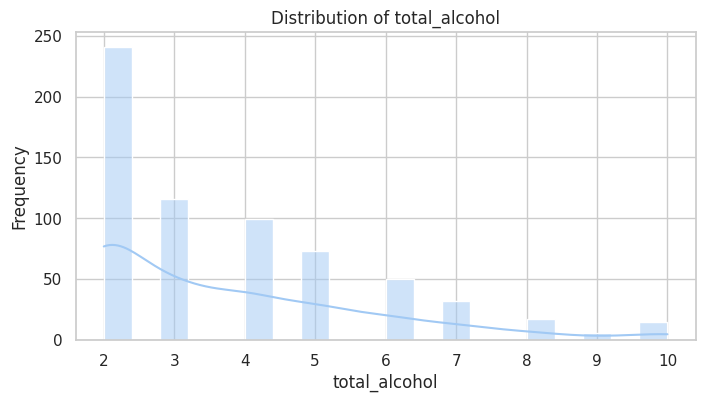

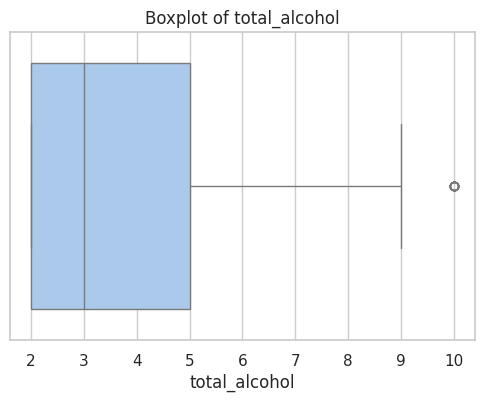

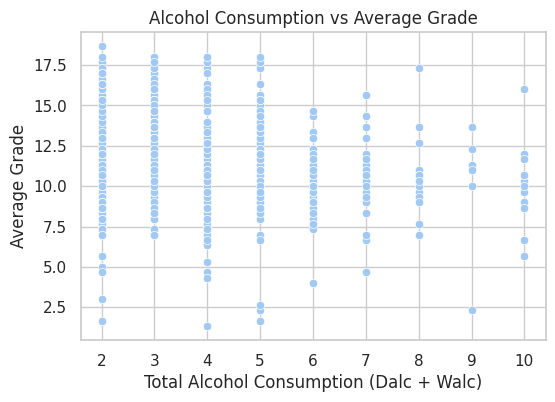

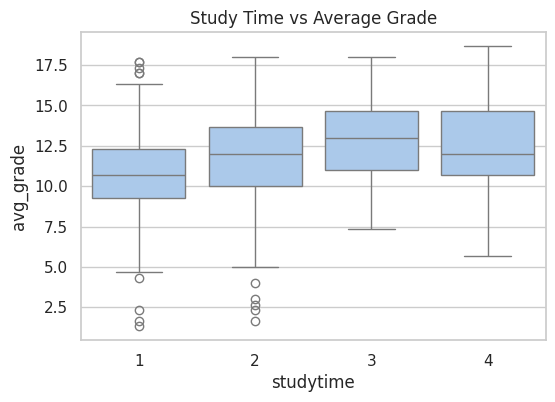

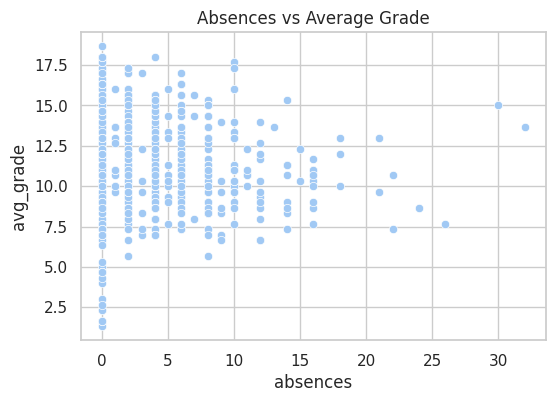

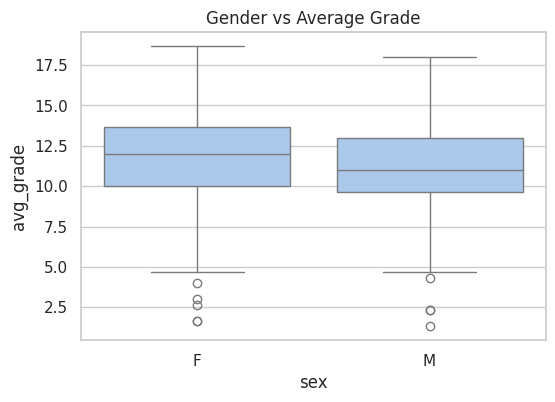

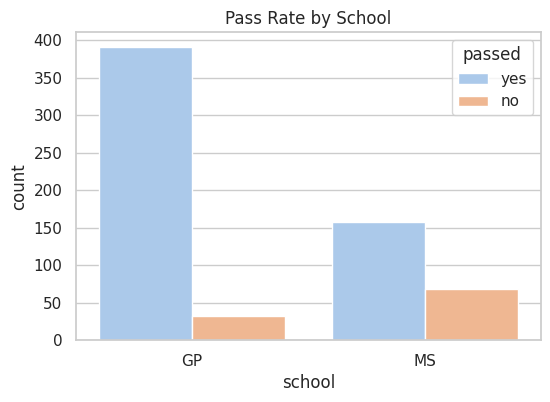

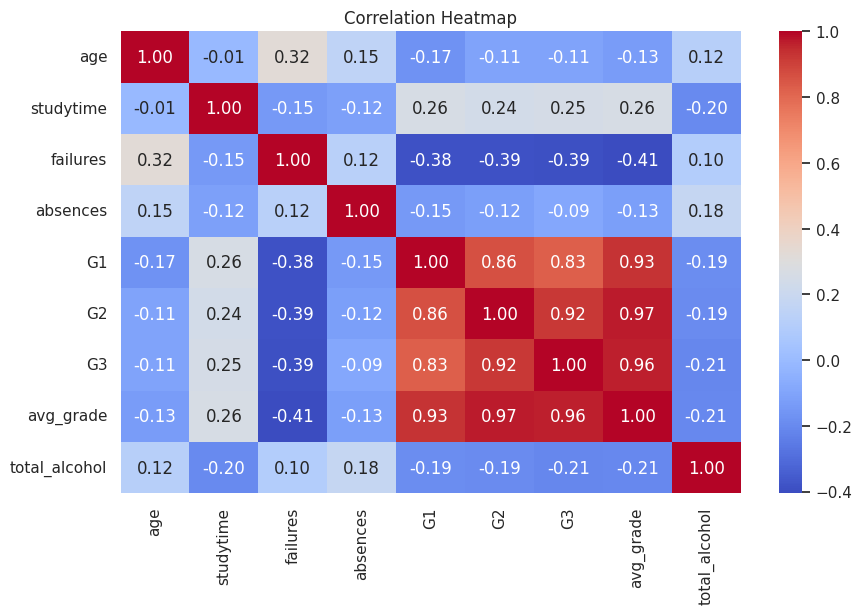

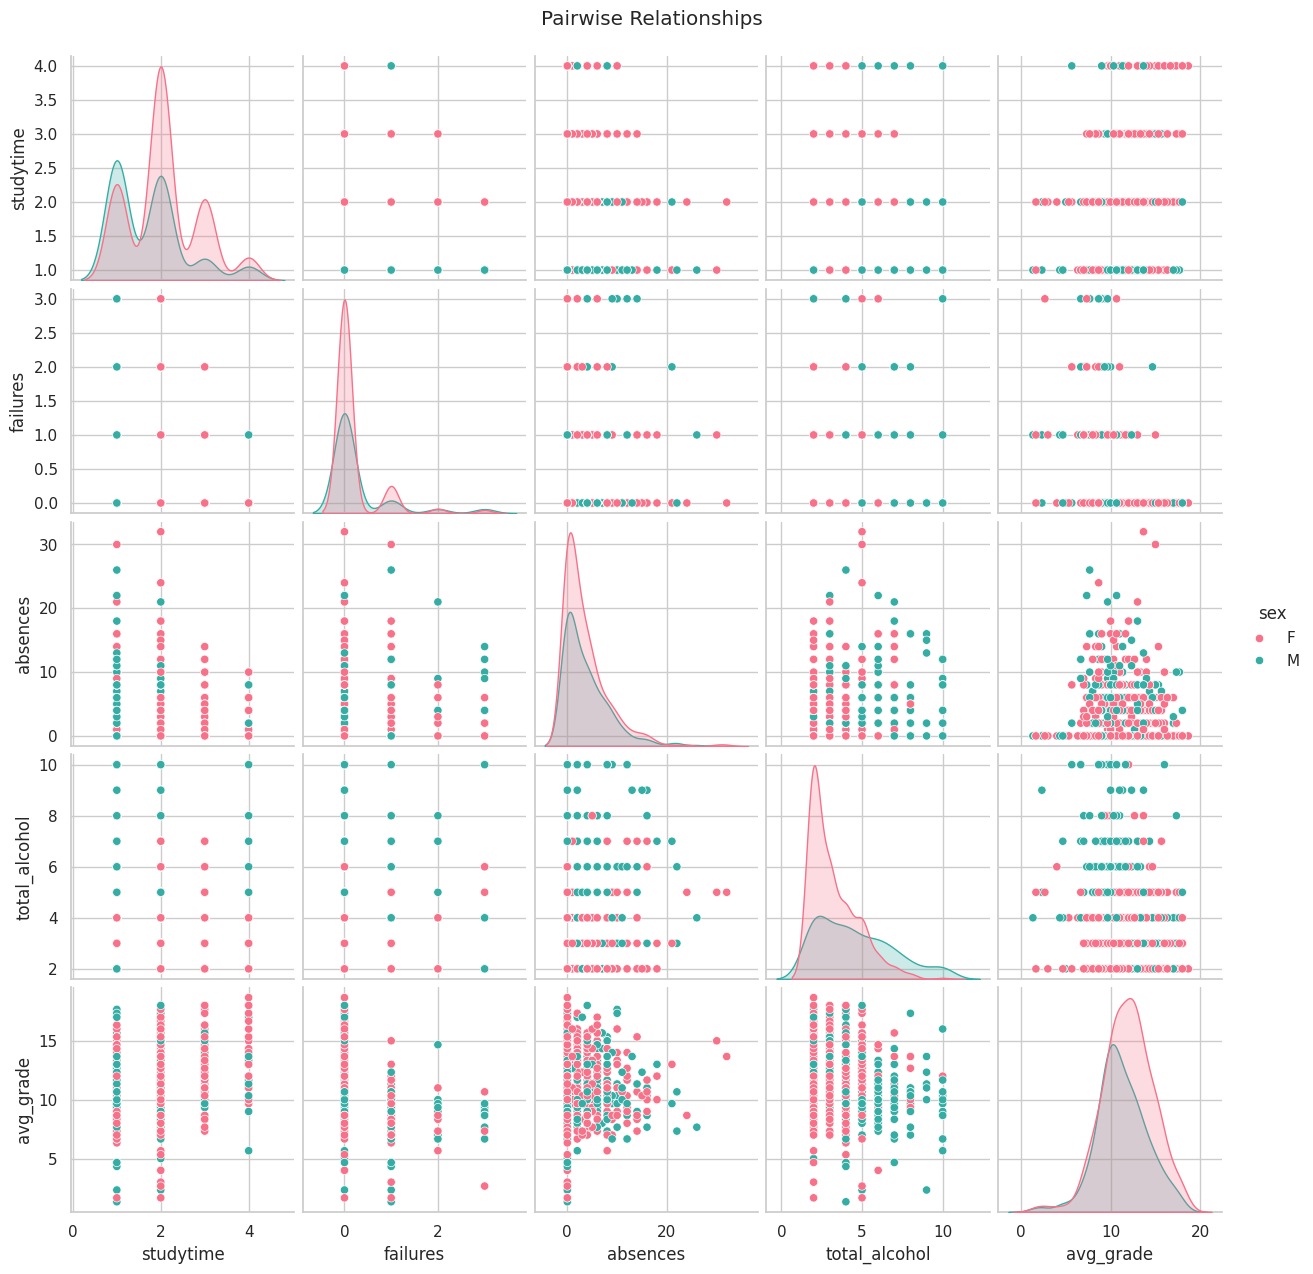

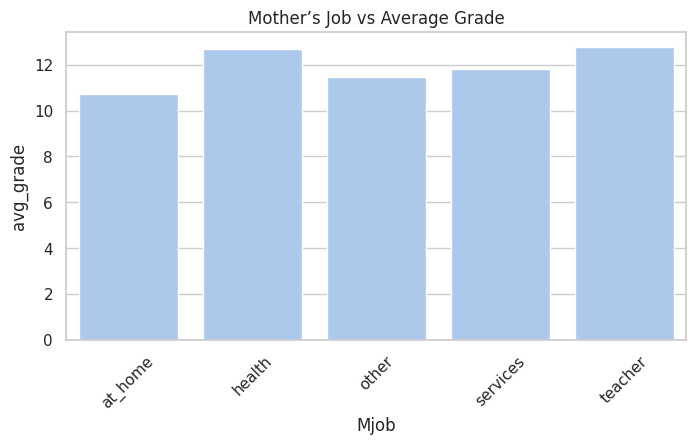

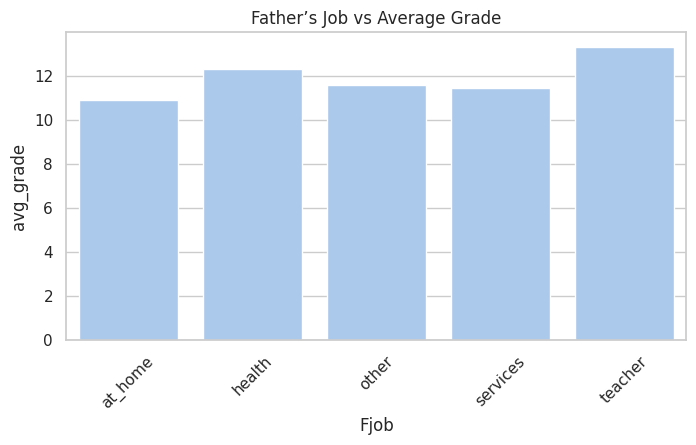


Average Grade by Gender and School:

school         GP         MS
sex                         
F       12.597750  10.778539
M       11.774194   9.941667


/tmp/ipython-input-2352149774.py:106: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(values='avg_grade', index='sex', columns='school', aggfunc='mean')


In [ ]:
## Step 1: Importing Required Libraries
from google.colab import files
uploaded = files.upload()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Uploading and Loading the Dataset
df = pd.read_excel('student-por.xlsx')
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

## Step 3: Exploring the Dataset
df.head()
df.info()
df.describe()

## Step 4: Checking for Missing and Duplicate Values
print("Missing values:\n", df.isnull().sum())
df = df.dropna()
df = df.drop_duplicates()

## Step 5: Converting Categorical Columns
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus',
                    'Mjob', 'Fjob', 'reason', 'guardian']
for col in categorical_cols:
    df[col] = df[col].astype('category')

## Step 6: Creating New Columns
df['total_alcohol'] = df['Dalc'] + df['Walc']
df['avg_grade'] = df[['G1', 'G2', 'G3']].mean(axis=1)
df['passed'] = df['G3'].apply(lambda x: 'yes' if x >= 10 else 'no')

## Step 7: Distribution of Categorical Variables
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (8, 5)

for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

## Step 8: Distribution of Numerical Variables
    num_cols = ['age', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3', 'avg_grade', 'total_alcohol']
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

## Step 9: Relationship Between Alcohol Consumption and Grades
plt.figure(figsize=(6,4))
sns.scatterplot(x='total_alcohol', y='avg_grade', data=df)
plt.title('Alcohol Consumption vs Average Grade')
plt.xlabel('Total Alcohol Consumption (Dalc + Walc)')
plt.ylabel('Average Grade')
plt.show()

## Step 10: Study Time vs Average Grade
plt.figure(figsize=(6,4))
sns.boxplot(x='studytime', y='avg_grade', data=df)
plt.title('Study Time vs Average Grade')
plt.show()

## Step 11: Absences vs Average Grade
plt.figure(figsize=(6,4))
sns.scatterplot(x='absences', y='avg_grade', data=df)
plt.title('Absences vs Average Grade')
plt.show()

##Step 12: Average grade by gender
plt.figure(figsize=(6,4))
sns.boxplot(x='sex', y='avg_grade', data=df)
plt.title('Gender vs Average Grade')
plt.show()

##Step 13: Pass rate by school
plt.figure(figsize=(6,4))
sns.countplot(x='school', hue='passed', data=df)
plt.title('Pass Rate by School')
plt.show()

## Step 14: Correlation Analysis
corr = df[num_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Step 15: Visualize multiple relationships between studytime, absences, failures, etc.
sns.pairplot(df, vars=['studytime', 'failures', 'absences', 'total_alcohol', 'avg_grade'],
             hue='sex', palette='husl')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

## Step 16: Parental Job Impact on Student Grades
plt.figure(figsize=(8,4))
sns.barplot(x='Mjob', y='avg_grade', data=df, estimator='mean', errorbar=None)
plt.title('Mother’s Job vs Average Grade')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x='Fjob', y='avg_grade', data=df, estimator='mean', errorbar=None)
plt.title('Father’s Job vs Average Grade')
plt.xticks(rotation=45)
plt.show()

## Step 17: Compare the average grade of male and female students across schools.
pivot = df.pivot_table(values='avg_grade', index='sex', columns='school', aggfunc='mean')
print("\nAverage Grade by Gender and School:\n")
print(pivot)




# 🎓 Data Analytics Final Project  
## Student Performance Analysis using Python (student-por.xlsx)

**Tool Used:** Google Colab  
**Libraries:** pandas, matplotlib, seaborn  
**Dataset:** student-por.xlsx  


### 📘 Objective
The main objective of this project is to analyze the factors affecting student academic performance.  
We explore how study time, absences, parental background, gender, and alcohol consumption influence average grades.  
Through data cleaning, visualization, and correlation analysis, this project aims to generate meaningful insights and actionable recommendations to improve student outcomes.

---

### 🧭 Project Steps Overview
1. Import and upload dataset  
2. Explore and clean data  
3. Convert data types and create new columns  
4. Visualize categorical and numerical distributions  
5. Study relationships between variables  
6. Generate insights and recommendations  
7. Conclude with findings and future scope  

---

>


# **# Project Report - Insight Generation & Conclusion**


## Executive Summary
This analysis examines student performance using the dataset *student-por.xlsx*.  
We studied how factors like study time, absences, gender, parental jobs, and alcohol consumption affect student's average grades.

## Key Insights
1. **Study time improves grades**- students who study more hours have higher average grades.
2. **Absences lower grades** - more missed classes → lower scores.
3. **Higher alcohol use slightly reduces performance.**
4. **Female students have a slightly higher average grade than males.**
5. **Parental job and school environment affect student performance.**

## Recommendations
- Encourage students to increase consistent study hours.  
- Track attendance and support frequently absent students.  
- Educate students about the effects of alcohol on learning.  
- Review differences between schools and share best practices.

## Limitations & Next Steps
The data covers limited features and one time period; results show correlation, not causation.  
Next steps: collect more data (e.g., parental education, motivation) and try predictive models for student success.

## Conclusion
Study time and attendance are the strongest factors affecting performance.  
Encouraging good study habits and regular attendance can improve overall student outcomes.
